# Feature Scaling




For ordinary least squares (OLS) regression, the scale of the features does not matter. However, for some other machine learning method that we will introduce later in this class, the magnitude of the features can have a significant impact on the model. 

For example, many machine learning algorithm require some notion of "distance" between data points in high-dimensional space. For example, if we consider the Euclidean distance between two data points, the distance between two points $x$ and $y$ in $d$-dimensional space is

$$ \sqrt{\sum_{i=1}^d (x_i - y_i)^2} $$

where $x_i$ and $y_i$ are the $i$-th feature/coordinate of the two data points. If the features are on different scales, then the distance will be dominated by the features with the largest scale.

Let $X$ be the feature vector (one column of the design matrix) and $X'$ to be the scaled feature vector.

Here some scaling methods:

- Min-max scaling: scales the data to be in the range [0, 1]

$$ X' = \frac{X - \min(X)}{\max(X) - \min(X)} $$

- Standardization (z-score scaling): scales the data to have mean 0 and standard deviation 1

$$ X' = \frac{X - \bar{X}}{\sigma_X} $$

where $\bar{X}$ is the sample mean of $X$ and $\sigma_X$ is the sample standard deviation of $X$.

These are linear transformations of the data. Sometimes we also want to transform the data non-linearly. For example, we might want to take the logarithm of the data if the data spans several orders of magnitude.

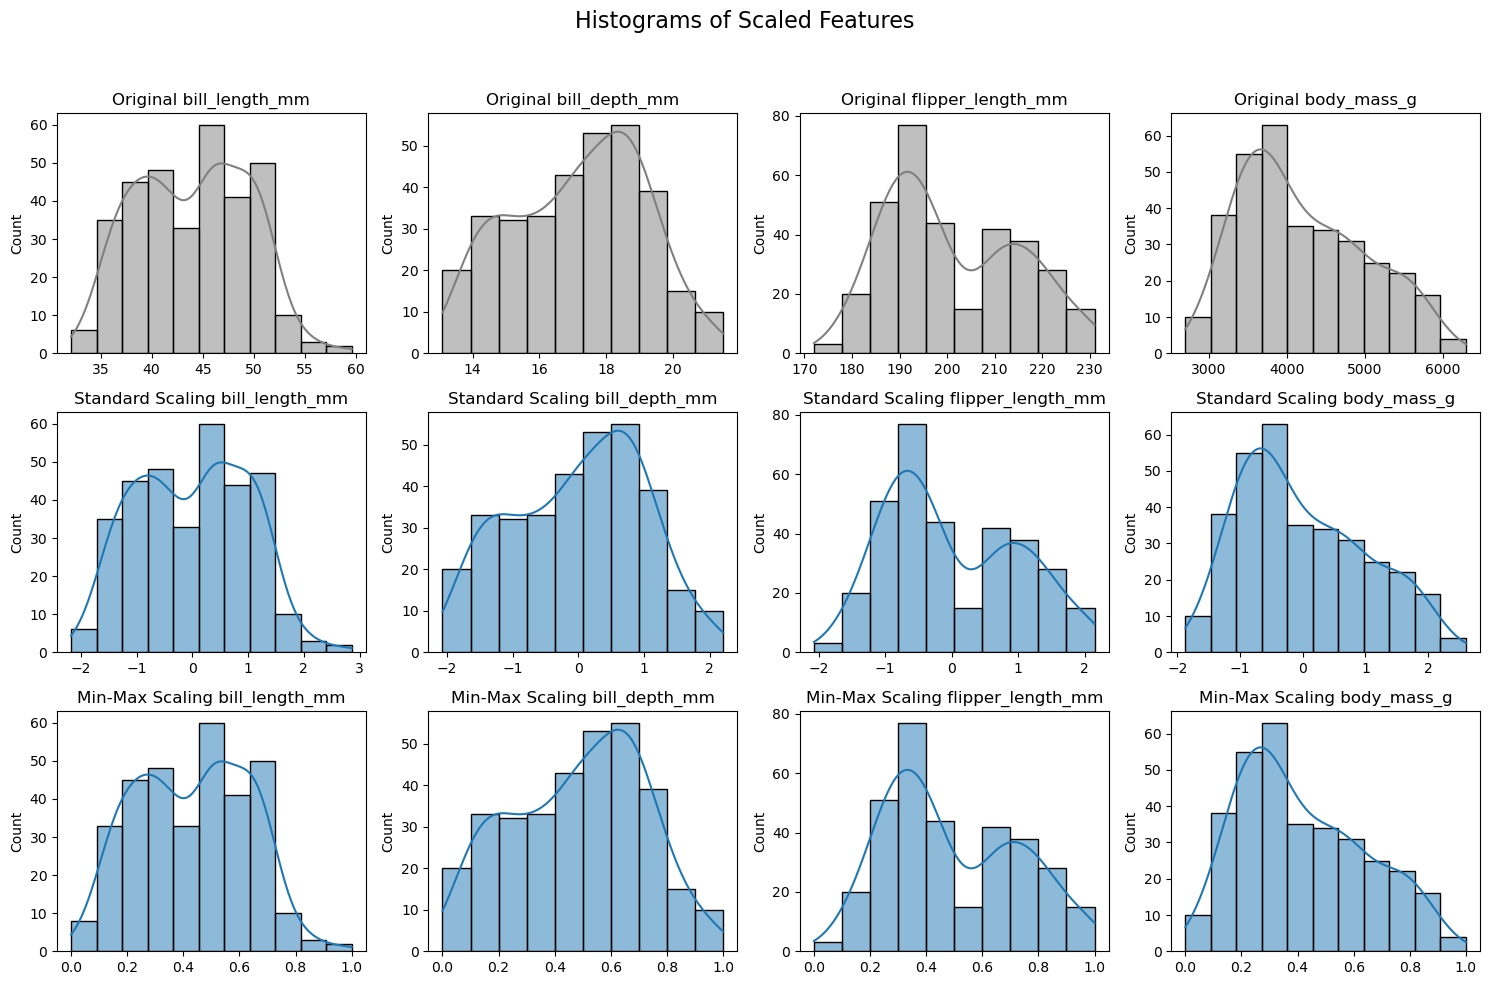

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Load the Penguins dataset
df = sns.load_dataset('penguins')
df.dropna(inplace=True)  # Remove missing values

# Selecting numerical features
numerical_features = df.select_dtypes(include=['float64'])

# Creating scalers
scalers = {
    'Standard Scaling': StandardScaler(),
    'Min-Max Scaling': MinMaxScaler()
}

# Plotting the histograms
fig, axes = plt.subplots(len(scalers) + 1, len(numerical_features.columns), figsize=(15, 10))
fig.suptitle('Histograms of Scaled Features', fontsize=16)

# Original data histogram
for i, feature in enumerate(numerical_features.columns):
    sns.histplot(numerical_features[feature], ax=axes[0, i], kde=True, color='gray')
    axes[0, i].set_title(f'Original {feature}')
    axes[0, i].set_xlabel('')

# Scaled data histograms
for row, (name, scaler) in enumerate(scalers.items(), start=1):
    # Fit and transform the data
    scaled_data = scaler.fit_transform(numerical_features)
    scaled_df = pd.DataFrame(scaled_data, columns=numerical_features.columns)
    
    for i, feature in enumerate(scaled_df.columns):
        sns.histplot(scaled_df[feature], ax=axes[row, i], kde=True)
        axes[row, i].set_title(f'{name} {feature}')
        axes[row, i].set_xlabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust subplots to fit the title
plt.show()
